# Quantum Cryptography
## Project Implementation: Design and implementation of the Ufa,N circuit of Shor Algorithm


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import math
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [15]:
def a_x_mod55(a,power):

    """Controlled multiplication by a mod 55"""
    if a not in [2,4,7,8,13,42,47,48,51,53]:
        raise ValueError("'a' must be 2,4,7,8,13,42,47,48,51,53")
    U = QuantumCircuit(6)        
    for iteration in range(power):
        if a in [2,53]: #done
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(4,3)
            U.swap(5,4)
            #U.barrier()
            
        if a in [4,51]: #done
            
            U.swap(3,2)
            U.swap(2,1)
            U.swap(5,4)
            U.swap(4,3)
            #U.barrier()
        
        if a in [7,48]: #done
            U.cx(3,0)
            U.cx(4,1)
            U.cx(5,4)
            U.cx(5,3)
            #U.barrier()
            
        if a in [8,47]: # done
            U.cx(5,2)
            U.x(5)
            #U.barrier()

        if a in [13,42]: # done
            U.x(2)
            #U.barrier()
            U.swap(5,4)
            U.swap(4,3)
            #U.barrier()
            U.cx(5,4)
            #U.barrier()
            U.x(5)
            #U.barrier()

    #return U.draw()
    U = U.to_gate()
    U.name = "%i^%i mod 55" % (a, power)
    c_U = U.control()
    return c_U

#000100 4
#001000 8
#010000
#000111 = 7
#110001 = 49

#000011 = 3
#001001 = 9 

#001101 13

In [7]:
a_x_mod55(2,2**1)

░                 ░ 
q_0: ─X──────────────░──X──────────────░─
      │              ░  │              ░ 
q_1: ─X──X───────────░──X──X───────────░─
         │           ░     │           ░ 
q_2: ────X──X────────░─────X──X────────░─
            │        ░        │        ░ 
q_3: ───────X──X─────░────────X──X─────░─
               │     ░           │     ░ 
q_4: ──────────X──X──░───────────X──X──░─
                  │  ░              │  ░ 
q_5: ─────────────X──░──────────────X──░─
                     ░                 ░

In [8]:
a_x_mod55(4,2**1)

░        ░ 
q_0: ───────░────────░─
            ░        ░ 
q_1: ────X──░─────X──░─
         │  ░     │  ░ 
q_2: ─X──X──░──X──X──░─
      │     ░  │     ░ 
q_3: ─X──X──░──X──X──░─
         │  ░     │  ░ 
q_4: ─X──X──░──X──X──░─
      │     ░  │     ░ 
q_5: ─X─────░──X─────░─
            ░        ░

In [9]:
a_x_mod55(7,2**1)

┌───┐                ░ ┌───┐                ░ 
q_0: ┤ X ├────────────────░─┤ X ├────────────────░─
     └─┬─┘┌───┐           ░ └─┬─┘┌───┐           ░ 
q_1: ──┼──┤ X ├───────────░───┼──┤ X ├───────────░─
       │  └─┬─┘           ░   │  └─┬─┘           ░ 
q_2: ──┼────┼─────────────░───┼────┼─────────────░─
       │    │       ┌───┐ ░   │    │       ┌───┐ ░ 
q_3: ──■────┼───────┤ X ├─░───■────┼───────┤ X ├─░─
            │  ┌───┐└─┬─┘ ░        │  ┌───┐└─┬─┘ ░ 
q_4: ───────■──┤ X ├──┼───░────────■──┤ X ├──┼───░─
               └─┬─┘  │   ░           └─┬─┘  │   ░ 
q_5: ────────────■────■───░─────────────■────■───░─
                          ░                      ░

In [10]:
a_x_mod55(8,2**1)

░            ░ 
q_0: ───────────░────────────░─
                ░            ░ 
q_1: ───────────░────────────░─
     ┌───┐      ░ ┌───┐      ░ 
q_2: ┤ X ├──────░─┤ X ├──────░─
     └─┬─┘      ░ └─┬─┘      ░ 
q_3: ──┼────────░───┼────────░─
       │        ░   │        ░ 
q_4: ──┼────────░───┼────────░─
       │  ┌───┐ ░   │  ┌───┐ ░ 
q_5: ──■──┤ X ├─░───■──┤ X ├─░─
          └───┘ ░      └───┘ ░

In [13]:
a_x_mod55(13,2**1)

░        ░       ░       ░       ░        ░       ░       ░ 
q_0: ──────░────────░───────░───────░───────░────────░───────░───────░─
           ░        ░       ░       ░       ░        ░       ░       ░ 
q_1: ──────░────────░───────░───────░───────░────────░───────░───────░─
     ┌───┐ ░        ░       ░       ░ ┌───┐ ░        ░       ░       ░ 
q_2: ┤ X ├─░────────░───────░───────░─┤ X ├─░────────░───────░───────░─
     └───┘ ░        ░       ░       ░ └───┘ ░        ░       ░       ░ 
q_3: ──────░─────X──░───────░───────░───────░─────X──░───────░───────░─
           ░     │  ░ ┌───┐ ░       ░       ░     │  ░ ┌───┐ ░       ░ 
q_4: ──────░──X──X──░─┤ X ├─░───────░───────░──X──X──░─┤ X ├─░───────░─
           ░  │     ░ └─┬─┘ ░ ┌───┐ ░       ░  │     ░ └─┬─┘ ░ ┌───┐ ░ 
q_5: ──────░──X─────░───■───░─┤ X ├─░───────░──X─────░───■───░─┤ X ├─░─
           ░        ░       ░ └───┘ ░       ░        ░       ░ └───┘ ░

In [14]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [16]:
N = int(input('N: '))

n = math.ceil(math.log(N,2))
print("qubits representing N:")
print(n)
n_count = 2*n
print("qubits used in circuit:")
print(n_count)

N: 55
qubits representing N:
6
qubits used in circuit:
12


In [17]:
a = int(input('a: '))
from math import gcd

if gcd(a,N) == 1:
    exit
else:
    print("gcd is not 1")
    a = int(input('a: '))

a: 8


In [18]:
qc = QuantumCircuit(n_count + n, n_count)


# apply H
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x((n-1)+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(a_x_mod55(a,2**q), [q] + [i+n_count for i in range(n)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1) 

┌───┐                                                                                                                                                                                                   ┌────────┐┌─┐                                 
 q_0: ┤ H ├───────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0       ├┤M├─────────────────────────────────
      ├───┤       │                                                                                                                                                                                           │        │└╥┘┌─┐                              
 q_1: ┤ H ├───────┼──────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1       ├─╫─┤M├──────────────────────────────
      ├───┤       │              │                                                                                                                                                                            │        │ ║ └╥┘┌─┐                           
 q_2: ┤ H ├───────┼──────────────┼──────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤2       ├─╫──╫─┤M├───────────────────────────
      ├───┤       │              │              │                                                                                                                                                             │        │ ║  ║ └╥┘┌─┐                        
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤3       ├─╫──╫──╫─┤M├────────────────────────
      ├───┤       │              │              │              │                                                                                                                                              │        │ ║  ║  ║ └╥┘┌─┐                     
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤4       ├─╫──╫──╫──╫─┤M├─────────────────────
      ├───┤       │              │              │              │              │                                                                                                                               │        │ ║  ║  ║  ║ └╥┘┌─┐                  
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────┤5       ├─╫──╫──╫──╫──╫─┤M├──────────────────
      ├───┤       │              │              │              │              │               │                                                                                                               │   QFT† │ ║  ║  ║  ║  ║ └╥┘┌─┐               
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■───────────────────────────────────────────────────────────────────────────────────────────────┤6       ├─╫──╫──╫──╫──╫──╫─┤M├───────────────
      ├───┤       │              │              │              │              │               │               │                                                                                               │        │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■──────────────────────────────────────────────────────────────────────────────┤7   

In [19]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()

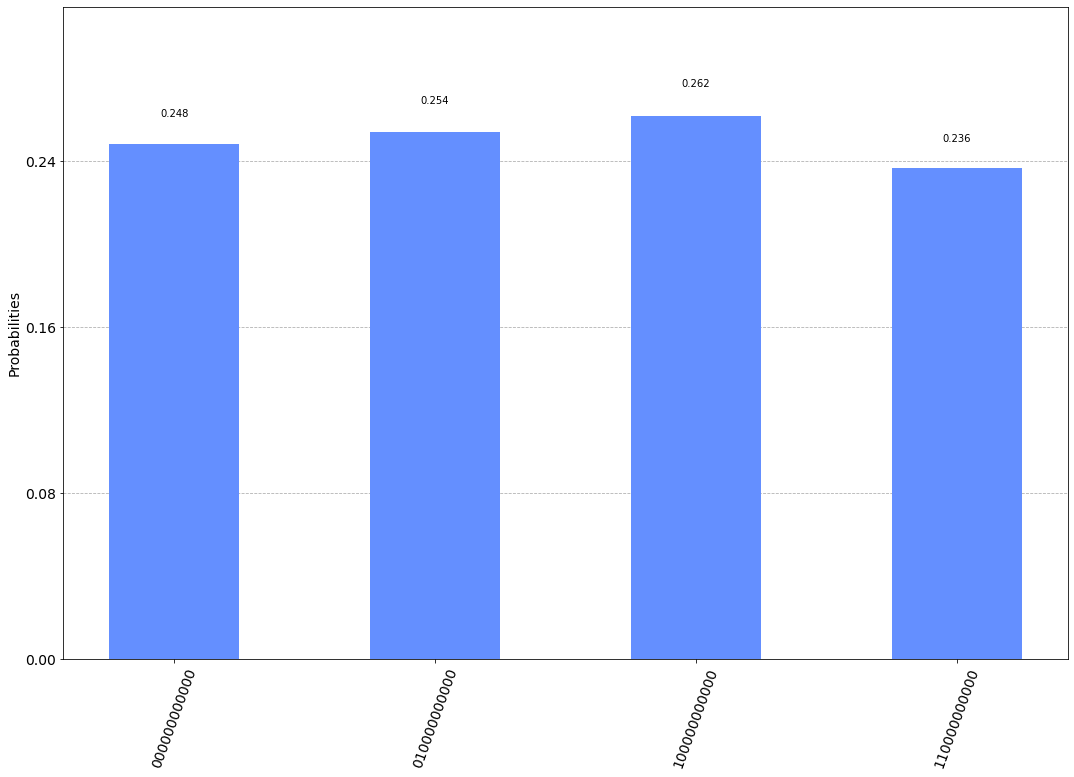

In [20]:
# each qubit
plot_histogram(counts,figsize = (18,12))

In [21]:
rows, measured_phases = [], []
even=[]


for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue 
    measured_phases.append(phase)

    frac = Fraction(phase).limit_denominator(N)


    # Add these values to the rows in our table:
    rows.append([f"{output} = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}",
                 f"{frac.numerator}/{frac.denominator}", frac.denominator])
    if frac.denominator not in even:
        if (frac.denominator)%2==0:
            even.append(frac.denominator)

headers=["Register Output", "Phase", "Fraction", "r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output             Phase Fraction  r
0   000000000000 =   0(dec)     0/4096 = 0.00      0/1  1
1  100000000000 = 2048(dec)  2048/4096 = 0.50      1/2  2
2  110000000000 = 3072(dec)  3072/4096 = 0.75      3/4  4
3  010000000000 = 1024(dec)  1024/4096 = 0.25      1/4  4


In [ ]:
print(even)
[2, 4]
